In [ ]:
!pip install mlnotify

     |████████████████████████████████| 62 kB 689 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
import re
import os
import nltk
import string
import datetime
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.metrics import Metric
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from keras.layers import Embedding, LSTM, Dense, Dropout
from google_drive_downloader import GoogleDriveDownloader as gdd

# import mlnotify


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
# tf.compat.v1.disable_eager_execution()
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.6.0
Running on TPU  ['10.45.254.26:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.45.254.26:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.45.254.26:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset 3.csv', encoding = "ISO-8859-1")
df.head

<bound method NDFrame.head of                                                   tweets  sentiment
0      just had a real good moment. i missssssssss hi...          0
1             is reading manga  http://plurk.com/p/mzp1e          0
2      @comeagainjen http://twitpic.com/2y2lx - http:...          0
3      @lapcat Need to send 'em to my accountant tomo...          0
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder          0
...                                                  ...        ...
10309  No Depression by G Herbo is my mood from now o...          1
10310  What do you do when depression succumbs the br...          1
10311  Ketamine Nasal Spray Shows Promise Against Dep...          1
10312  dont mistake a bad day with depression! everyo...          1
10313                                                  0          1

[10314 rows x 2 columns]>

In [5]:
nltk.download('stopwords')
english_stops = set(stopwords.words('english'))
nltk.download('punkt')
puncset = list(string.punctuation)
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
def preprocessed(text):
  sentence = [lemmatizer.lemmatize(i, pos='v') for i in text.split() if i not in puncset and i not in english_stops]
  sentence = [w for w in sentence if w.isalpha()]
  return ' '.join(sentence)

In [7]:
df['tweets'] = df.tweets.map(lambda x: preprocessed(x))

In [12]:
df.tail(20)

,tweets,sentiment
10294,Fuck honestly kill already,1
10295,I love Lauren much Loudly cry Loudly cry Heavy...,1
10296,fvck depression,1
10297,suffer chronic depression,1
10298,And I I make sacrifice I want achieve My famil...,1
10299,Engaging physical activity decrease chance dev...,1
10300,always darling,1
10301,suffer thankful guy help I love guy much even ...,1
10302,More one US children teens anxiety depression,1
10303,IM GOING TO SEE NEXT WEEK IN IM SO MY DEPRESSI...,1


In [13]:
sentence_length = []
count = Counter()
for i in df.tweets:
  temp = i.split()
  sentence_length.append(len(temp))
  for j in temp:
    count[j] += 1

In [14]:
num_words = len(count)
max_length = max(sentence_length)
print('Number Of Words: ',num_words)
print('Maximum Length of Sentence: ',max_length)
print('Dataset Length : ', df.shape[0])

Number Of Words:  12883
Maximum Length of Sentence:  43
Dataset Length :  10314


In [15]:
from sklearn.model_selection import train_test_split

train_text,test_text,train_label,test_label = train_test_split(df['tweets'], df['sentiment'], stratify=df['sentiment'],test_size=0.20,random_state=1)

In [16]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df['tweets'])
word_index = tokenizer.word_index

In [17]:
train_text = tokenizer.texts_to_sequences(train_text)
test_text = tokenizer.texts_to_sequences(test_text)

In [18]:
train_padding = pad_sequences(
    train_text, maxlen=max_length, padding='post', truncating='post'
)
test_padding = pad_sequences(
    test_text, maxlen=max_length, padding='post', truncating='post'
)

In [19]:
print(len(train_padding))
print(len(test_padding))

8251
2063


In [20]:
lr = 0.001

In [21]:
max_features =80000
embedding_dim = 128
sequence_length = max_length

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))                                    

model.add(tf.keras.layers.Conv1D(1024,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005)))                               
model.add(tf.keras.layers.Conv1D(512,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005))) 
model.add(tf.keras.layers.Conv1D(256,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005))) 

model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))

In [22]:
model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
              metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 43, 128)           10240128  
_________________________________________________________________
conv1d (Conv1D)              (None, 41, 1024)          394240    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 39, 512)           1573376   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 37, 256)           393472    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2

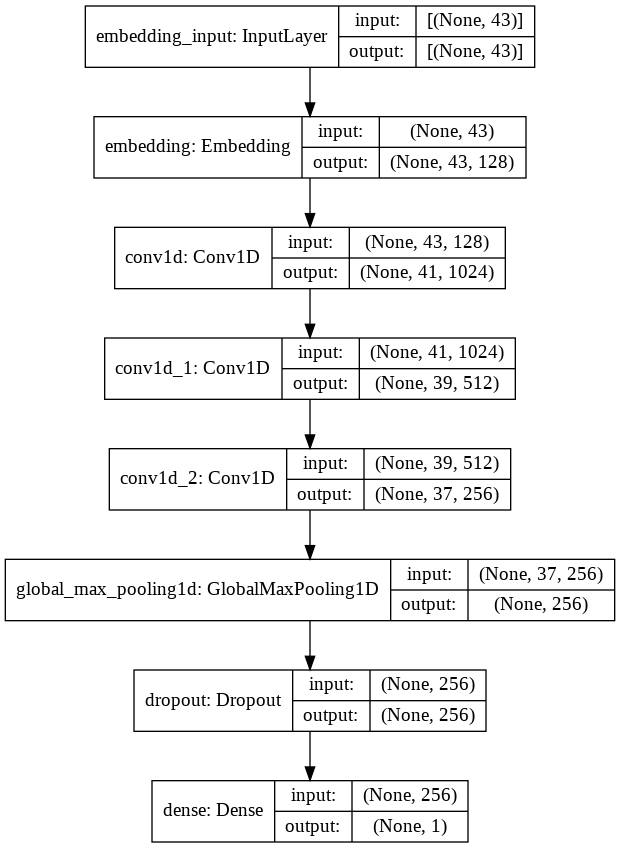

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [23]:
epochs = 100
batch = 128
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_padding, train_label, epochs=epochs, verbose=1,
                    batch_size=batch,
                    validation_data = (test_padding,test_label))

Epoch 1/100
65/65 [==============================] - 11s 139ms/step - loss: 1.7183 - true_positives: 8.0000 - true_negatives: 6366.0000 - false_positives: 34.0000 - false_negatives: 1843.0000 - accuracy: 0.7725 - precision: 0.1905 - recall: 0.0043 - val_loss: 0.5554 - val_true_positives: 0.0000e+00 - val_true_negatives: 1600.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 463.0000 - val_accuracy: 0.7756 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
65/65 [==============================] - 8s 127ms/step - loss: 0.3510 - true_positives: 1065.0000 - true_negatives: 6263.0000 - false_positives: 137.0000 - false_negatives: 786.0000 - accuracy: 0.8881 - precision: 0.8860 - recall: 0.5754 - val_loss: 0.2365 - val_true_positives: 379.0000 - val_true_negatives: 1579.0000 - val_false_positives: 21.0000 - val_false_negatives: 84.0000 - val_accuracy: 0.9491 - val_precision: 0.9475 - val_recall: 0.8186
Epoch 3/100
65/65 [==============================] - 8s 127ms/st

In [24]:
f1_score = []
for p,r in zip(history.history['precision'], history.history['recall']):
  temp = 2 * ((p*r) + (p+r))
  f1_score.append(temp)
epoch = [x for x in range(epochs+1)]

f1_score_val = []
for p,r in zip(history.history['val_precision'], history.history['val_recall']):
  temp = 2 * ((p*r) + (p+r))
  f1_score_val.append(temp)

In [25]:

f1_score_df = pd.DataFrame()
f1_score_df = pd.DataFrame(columns = ['Epoch','F1 Score'])
f1_score_df['Epoch'] = pd.Series(epoch)
f1_score_df['F1 Score'] = pd.Series(f1_score)

f1_score_df_val = pd.DataFrame()
f1_score_df_val = pd.DataFrame(columns = ['Epoch','F1 Score'])
f1_score_df_val['Epoch'] = pd.Series(epoch)
f1_score_df_val['F1 Score'] = pd.Series(f1_score_val)



Text(0.5, 0, 'Epochs')

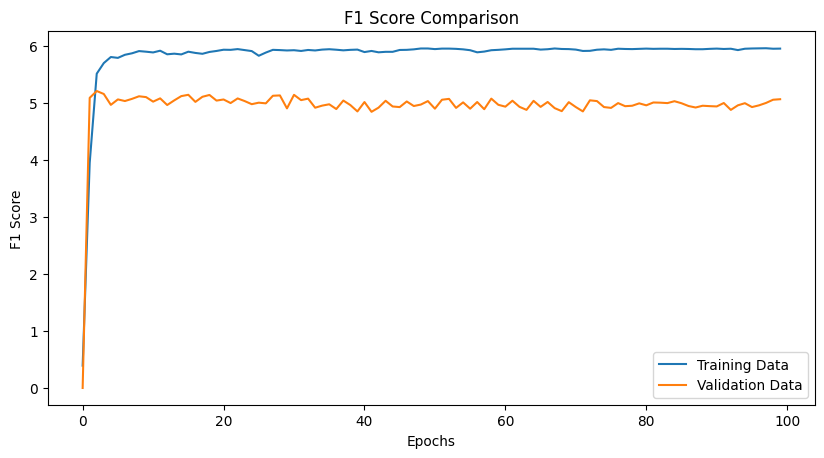

In [26]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['figure.dpi'] = 99
plt.plot(f1_score_df['Epoch'], f1_score_df['F1 Score'],label="Training Data")
plt.plot(f1_score_df['Epoch'], f1_score_df_val['F1 Score'],label="Validation Data")
plt.title('F1 Score Comparison')
plt.legend(loc="lower right")
plt.ylabel('F1 Score')
plt.xlabel('Epochs')



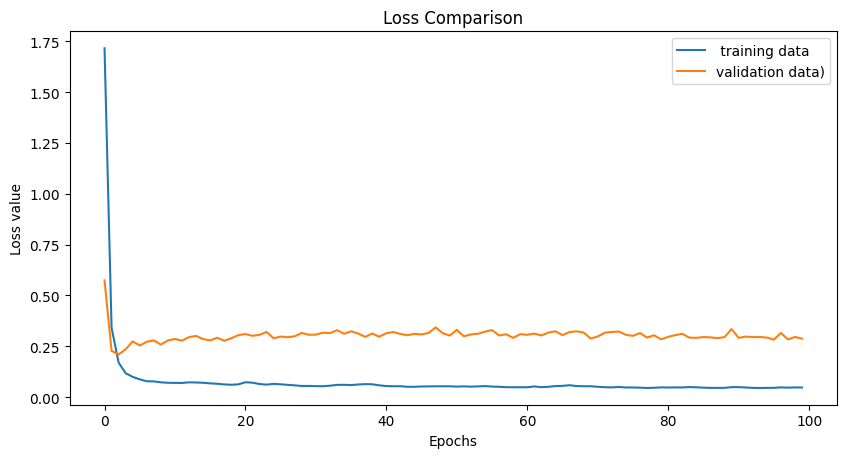

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['figure.dpi'] = 99
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data)')
plt.title('Loss Comparison')
plt.ylabel('Loss value')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

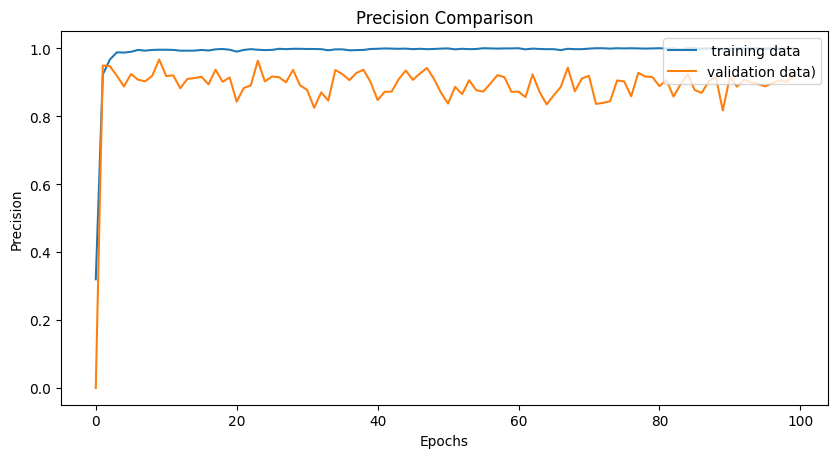

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['figure.dpi'] = 99
plt.plot(history.history['precision'], label=' training data')
plt.plot(history.history['val_precision'], label='validation data)')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

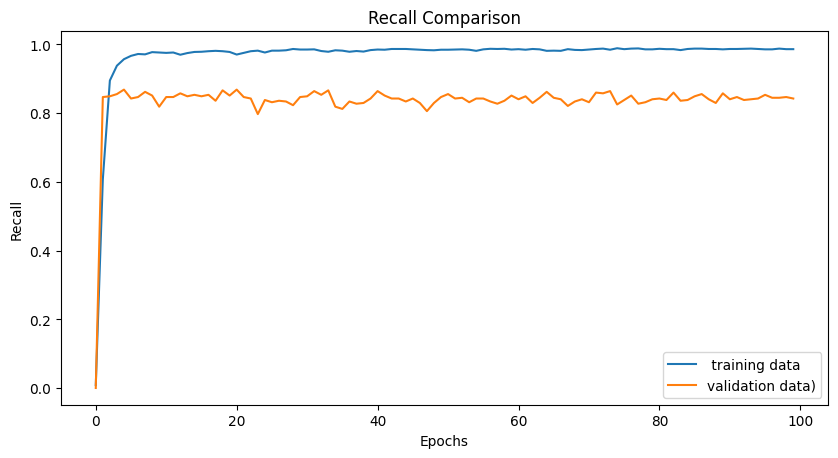

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['figure.dpi'] = 99
plt.plot(history.history['recall'], label=' training data')
plt.plot(history.history['val_recall'], label='validation data)')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

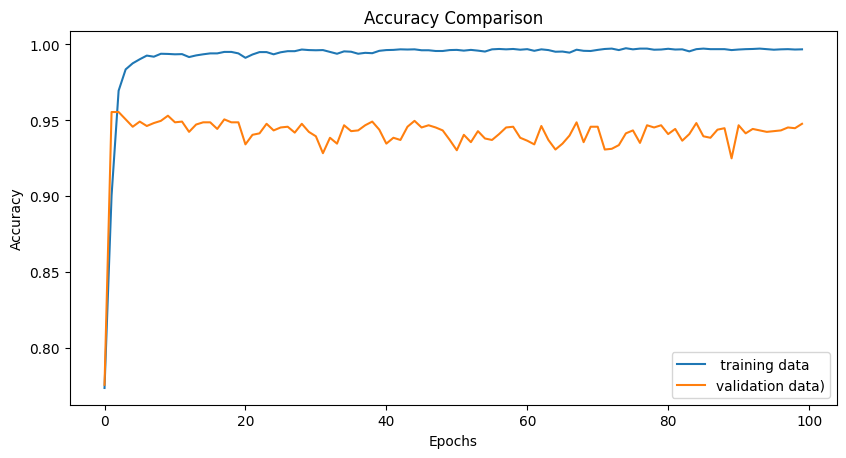

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['figure.dpi'] = 99
plt.plot(history.history['accuracy'], label=' training data')
plt.plot(history.history['val_accuracy'], label='validation data)')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
history.history

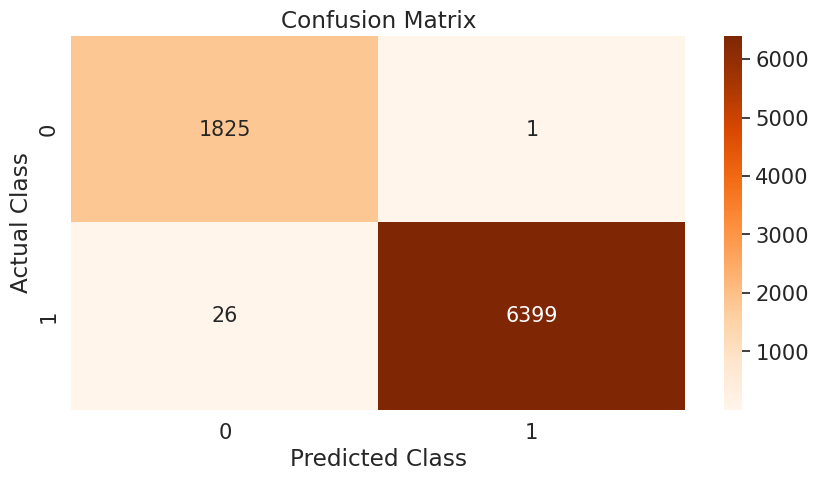

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['figure.dpi'] = 99

array = [[history.history['true_positives'][-1],history.history['false_positives'][-1]],
         [history.history['false_negatives'][-1],history.history['true_negatives'][-1]]]
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 15},cmap='Oranges', fmt='g') 
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.savefig('Confusion_Matrix.png')
plt.show()

In [ ]:
def predict_sentiment(text):

  text = tokenizer.texts_to_sequences(text)
  test_vector = pad_sequences(
    text, maxlen = max_length, padding='post', truncating='post'
  )
  
  # print(model.predict(test_vector))
  predictions = model.predict(test_vector)
  predictions = list(predictions.flatten())
  for prediction,txt in zip(predictions,test_text):
    if prediction>0.5:
      print()
      print(txt)
      print(" ---------- >   Negative Sentiment. [",prediction,"]")
    else:
      print()
      print(txt)
      print(" ---------- >   Positive Sentiment. [", prediction,"]")

  

In [ ]:
test_text = ["In spring the flower blooms." , 
             "Depression leads to suicide.",
             "You are a bad human being.", 
             "I had a great time, Thank you.",]

predict_sentiment(test_text)




In spring the flower blooms.
 ---------- >   Positive Sentiment. [ 0.011067629 ]

Depression leads to suicide.
 ---------- >   Negative Sentiment. [ 1.0 ]

You are a bad human being.
 ---------- >   Negative Sentiment. [ 0.999926 ]

I had a great time, Thank you.
 ---------- >   Positive Sentiment. [ 4.845202e-05 ]


In [36]:
accuracy = history.history['accuracy']
print("Average Accuracy Tarining: ", sum(accuracy)/len(accuracy)*100, "%")
accuracy = history.history['val_accuracy']
print("Average Accuracy Validation: ", sum(accuracy)/len(accuracy)*100, "%")
accuracy = history.history['precision']
print("Average Precision Tarining: ", sum(accuracy)/len(accuracy)*100, "%")
accuracy = history.history['val_precision']
print("Average Precision Validation: ", sum(accuracy)/len(accuracy)*100, "%")
accuracy = history.history['recall']
print("Average Recall Tarining: ", sum(accuracy)/len(accuracy)*100, "%")
accuracy = history.history['val_recall']
print("Average Recall Validation: ", sum(accuracy)/len(accuracy)*100, "%")

print("Average F1 Score Tarining: ", sum(f1_score)/len(f1_score), "%")

print("Average  F1 Score Validation: ", sum(f1_score_val)/len(f1_score_val), "%")

Average Accuracy Tarining:  99.16737347841263 %
Average Accuracy Validation:  94.08676701784134 %
Average Precision Tarining:  98.73167575895786 %
Average Precision Validation:  88.42653769254684 %
Average Recall Tarining:  96.71798961935565 %
Average Recall Validation:  83.82721447944641 %
Average F1 Score Tarining:  5.835284020622967 %
Average  F1 Score Validation:  4.94185499897033 %
